In [20]:
import sys
sys.path.append("/home/phylab/hepwork/ma5-histo")
sys.path.append("/home/phylab/hepwork/ma5_expert")

import src.SafReader as sr
from CutFlowReader import Collection 

import pandas as pd
import numpy as np
import matplotlib, os
import matplotlib.pyplot as plt
# Matplotlib configuration
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
matplotlib.style.use('classic')
plt.rcParams['xtick.direction']     = 'in'
plt.rcParams['ytick.direction']     = 'in'
plt.rcParams['xtick.top']           = True
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.right']         = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import matplotlib.cm as cm

from matplotlib import pyplot
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
matplotlib.rc('text', usetex = True)
matplotlib.rc('font', **{'family' : "sans-serif"})
params= {'text.latex.preamble' : [r'\usepackage{amssymb}']}
pyplot.rcParams.update(params)

In [21]:
def df(fileLoc):
    data = sr.read(fileLoc=fileLoc)
    floatCols=['binMin', 'binMax', 'value']
    data[floatCols]  = data[floatCols].apply(pd.to_numeric, errors='coerce')
    data["bin"]      = (data.binMin+data.binMax)/2
    data             = data[data.binMax != np.inf]
    data             = data[data.binMin != -1*np.inf]
    data["binlabel"] = (data.binMin+data.binMax)/2
    return data

# Our framework in the limit of k_L = k_R = 0

14400     = lhaid     ! if pdlabel=lhapdf, this is the lhapdf number

5 = maxjetflavor    ! Maximum jet pdg code

2.4  = etal    ! max rap for the charged leptons

2600.0   = mmll    ! min invariant mass of l+l- (same flavour) lepton pair

3400.0  = mmllmax ! max invariant mass of l+l- (same flavour) lepton pair

In [212]:
# Absolute rapidity |y| > 0.

In [23]:
ma5 = '/home/phylab/hepwork/madanalysis5'

sm1  = Collection(collection_path= ma5+'/SSM_Zptoll/Output/SAF/SMtoll_poseta/MadAnalysis5job_0/Cutflows',
                    saf_file       = ma5+"/SSM_Zptoll/Output/SAF/SMtoll_poseta/SMtoll_poseta.saf",
                    lumi           = 100.)
sm1_sumw   = (sm1['Rap_No'][0].sumw)
sm1_histos = df(ma5+'/SSM_Zptoll/Output/SAF/SMtoll_poseta/MadAnalysis5job_0/Histograms/histos.saf')

sm2  = Collection(collection_path= ma5+'/SSM_Zptoll/Output/SAF/SMtoll_negeta/MadAnalysis5job_0/Cutflows',
                    saf_file       = ma5+"/SSM_Zptoll/Output/SAF/SMtoll_negeta/SMtoll_negeta.saf",
                    lumi           = 100.)
sm2_sumw   = (sm2['Rap_No'][0].sumw)
sm2_histos = df(ma5+'/SSM_Zptoll/Output/SAF/SMtoll_negeta/MadAnalysis5job_0/Histograms/histos.saf')


#sm1NLO  = Collection(collection_path= ma5+'/SSM_Zptoll/Output/SAF/BSMtoll_poseta/MadAnalysis5job_0/Cutflows',
#                    saf_file       = ma5+"/SSM_Zptoll/Output/SAF/BSMtoll_poseta/BSMtoll_poseta.saf",
#                    lumi           = 100.)
#sm1NLO_sumw   = (sm1NLO['Rap_0'][0].sumw)
#sm1NLO_histos = df(ma5+'/SSM_Zptoll/Output/SAF/BSMtoll_poseta/MadAnalysis5job_0/Histograms/histos.saf')

#sm2NLO  = Collection(collection_path= ma5+'/SSM_Zptoll/Output/SAF/BSMtoll_negeta/MadAnalysis5job_1/Cutflows',
#                    saf_file       = ma5+"/SSM_Zptoll/Output/SAF/BSMtoll_negeta/BSMtoll_negeta.saf",
#                    lumi=100.)
#sm2NLO_sumw   = (sm2NLO['Rap_0'][0].sumw)
#sm2NLO_histos = df(ma5+'/SSM_Zptoll/Output/SAF/BSMtoll_negeta/MadAnalysis5job_1/Histograms/histos.saf')

In [24]:
lumi = 100.

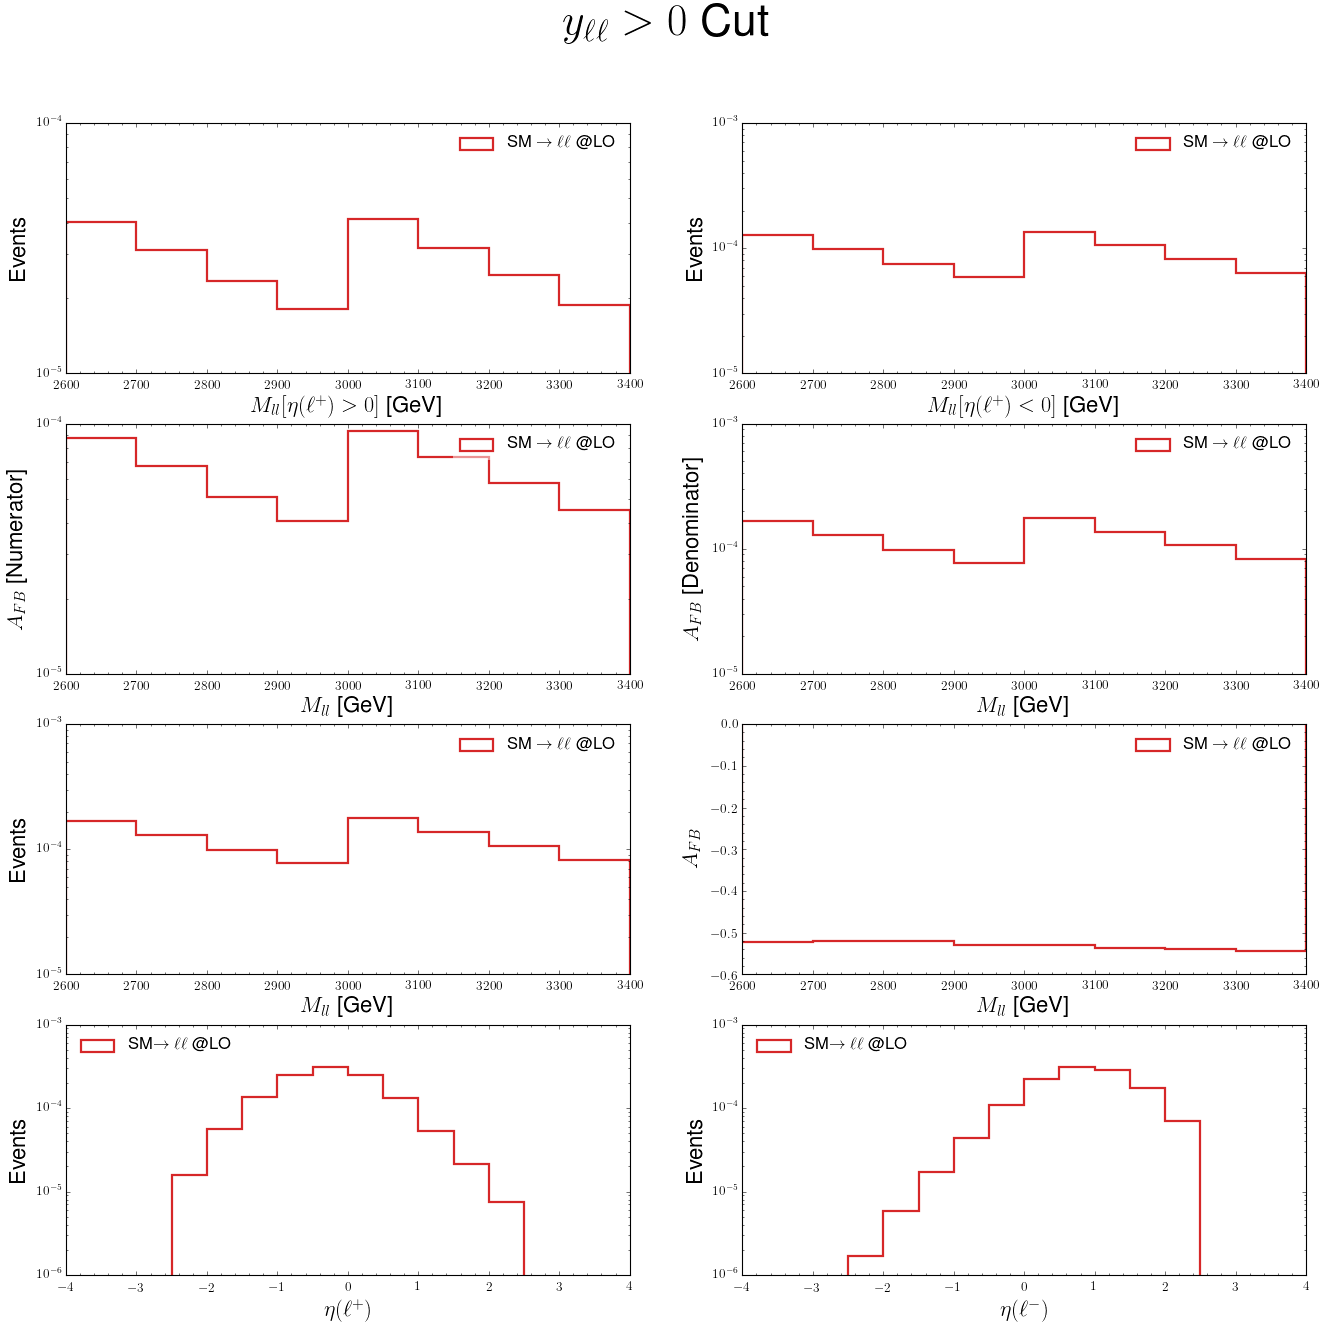

In [25]:
fig = plt.figure(1, figsize=(20, 18), facecolor='w', edgecolor='k')
fig.suptitle(r'$ y_{\ell \ell} > 0 $ Cut', fontsize=40)

bins = np.array(sm1_histos[sm1_histos.name=='AFB_pos_Rap_No'].binMin).tolist()+[max(sm1_histos[sm1_histos.name=='AFB_neg_Rap_No'].binMax)]
Etabins = np.array(sm1_histos[sm1_histos.name=='Eta_lp_Rap_No'].binMin).tolist()+[max(sm1_histos[sm1_histos.name=='Eta_lp_Rap_No'].binMax)]


lp_pos = plt.hist(sm1_histos[sm1_histos.name=='AFB_pos_Rap_No'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(sm1_histos[sm1_histos.name=='AFB_pos_Rap_0'].value,dtype=float)*sm1.xsec/sm1_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

lp_neg = plt.hist(sm2_histos[sm2_histos.name=='AFB_neg_Rap_No'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(sm2_histos[sm2_histos.name=='AFB_neg_Rap_No'].value,dtype=float)*sm2.xsec/sm2_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical") 

#lp_pos_NLO = plt.hist(sm1NLO_histos[sm1NLO_histos.name=='AFB_pos_Rap_0'].binlabel,bins=bins,
#                   histtype="bar", rwidth=1.0,alpha=0.,
#                   weights=lumi*np.array(sm1NLO_histos[sm1NLO_histos.name=='AFB_pos_Rap_0'].value,dtype=float)*sm1NLO.xsec/sm1NLO_sumw,
#                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
#                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

#lp_neg_NLO = plt.hist(sm2NLO_histos[sm2NLO_histos.name=='AFB_neg_Rap_0'].binlabel,bins=bins,
#                   histtype="bar", rwidth=1.0,alpha=0.,
#                   weights=lumi*np.array(sm2NLO_histos[sm2NLO_histos.name=='AFB_neg_Rap_0'].value,dtype=float)*sm2NLO.xsec/sm2NLO_sumw,
#                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
#                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical") 

AFBm = lp_pos[0] - lp_neg[0]
AFBp = lp_pos[0] + lp_neg[0]

#AFBm_NLO = lp_pos_NLO[0] - lp_neg_NLO[0]
#AFBp_NLO = lp_pos_NLO[0] + lp_neg_NLO[0]

lpEta_1 = plt.hist(sm1_histos[sm1_histos.name=='Eta_lp_Rap_No'].binlabel,bins=Etabins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(sm1_histos[sm1_histos.name=='Eta_lp_Rap_No'].value,dtype=float)*sm1.xsec/sm1_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
                  
lpEta_2 = plt.hist(sm2_histos[sm2_histos.name=='Eta_lp_Rap_No'].binlabel,bins=Etabins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(sm2_histos[sm2_histos.name=='Eta_lp_Rap_No'].value,dtype=float)*sm2.xsec/sm2_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")    

lmEta_1 = plt.hist(sm1_histos[sm1_histos.name=='Eta_lm_Rap_No'].binlabel,bins=Etabins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(sm1_histos[sm1_histos.name=='Eta_lm_Rap_No'].value,dtype=float)*sm1.xsec/sm1_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
                  
lmEta_2 = plt.hist(sm2_histos[sm2_histos.name=='Eta_lm_Rap_No'].binlabel,bins=Etabins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(sm2_histos[sm2_histos.name=='Eta_lm_Rap_No'].value,dtype=float)*sm2.xsec/sm2_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")


#lpEta_1_NLO = plt.hist(sm1NLO_histos[sm1NLO_histos.name=='Eta_lp_Rap_0'].binlabel,bins=Etabins,
#                   histtype="bar", rwidth=1.0,alpha=0.,
#                   weights=lumi*np.array(sm1NLO_histos[sm1NLO_histos.name=='Eta_lp_Rap_0'].value,dtype=float)*sm1NLO.xsec/sm1NLO_sumw,
#                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
#                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
                  
#lpEta_2_NLO = plt.hist(sm2NLO_histos[sm2NLO_histos.name=='Eta_lp_Rap_0'].binlabel,bins=Etabins,
#                   histtype="bar", rwidth=1.0,alpha=0.,
#                   weights=lumi*np.array(sm2NLO_histos[sm2NLO_histos.name=='Eta_lp_Rap_0'].value,dtype=float)*sm2NLO.xsec/sm2NLO_sumw,
#                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
#                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")    

#lmEta_1_NLO = plt.hist(sm1NLO_histos[sm1NLO_histos.name=='Eta_lm_Rap_0'].binlabel,bins=Etabins,
#                   histtype="bar", rwidth=1.0,alpha=0.,
#                   weights=lumi*np.array(sm1NLO_histos[sm1NLO_histos.name=='Eta_lm_Rap_0'].value,dtype=float)*sm1NLO.xsec/sm1NLO_sumw,
#                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
#                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
                  
#lmEta_2_NLO = plt.hist(sm2NLO_histos[sm2NLO_histos.name=='Eta_lm_Rap_0'].binlabel,bins=Etabins,
#                   histtype="bar", rwidth=1.0,alpha=0.,
#                   weights=lumi*np.array(sm2NLO_histos[sm2NLO_histos.name=='Eta_lm_Rap_0'].value,dtype=float)*sm2NLO.xsec/sm2NLO_sumw,
#                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
#                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")


ax1 = plt.subplot(4, 2, 1)
plt.hist(sm1_histos[sm1_histos.name=='AFB_pos_Rap_No'].binlabel,bins=bins,
             label=r'SM $ \to \ell \ell$ @LO', histtype="step", rwidth=1.0,
             weights=lp_pos[0],
             color=None, edgecolor='tab:red', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
#plt.hist(sm1NLO_histos[sm1NLO_histos.name=='AFB_pos_Rap_0'].binlabel,bins=bins,
#             label=r'SM + $Z^\prime \to \ell \ell$ @LO', histtype="step", rwidth=1.0,
#             weights=lp_pos_NLO[0],
#             color=None, edgecolor='tab:green', linewidth=2, linestyle="solid",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.xlabel('$M_{ll} [\eta(\ell^+)>0] $ [GeV]' , fontsize=20)
plt.ylabel('Events' , fontsize=20)
plt.yscale('log')

ax2 = plt.subplot(4, 2, 2)
plt.hist(sm2_histos[sm2_histos.name=='AFB_neg_Rap_No'].binlabel,bins=bins,
             label=r'SM $ \to \ell \ell$ @LO', histtype="step", rwidth=1.0,
             weights=lp_neg[0],
             color=None, edgecolor='tab:red', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
#plt.hist(sm2NLO_histos[sm2NLO_histos.name=='AFB_neg_Rap_0'].binlabel,bins=bins,
#             label=r'SM + $Z^\prime \to \ell \ell$ @LO', histtype="step", rwidth=1.0,
#             weights=lp_neg_NLO[0],
#             color=None, edgecolor='tab:green', linewidth=2, linestyle="solid",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.xlabel('$M_{ll} [\eta(\ell^+)<0] $ [GeV]' , fontsize=20)
plt.ylabel('Events' , fontsize=20)
plt.yscale('log')

ax3 = plt.subplot(4, 2, 3)
plt.hist(sm1_histos[sm1_histos.name=='AFB_neg_Rap_No'].binlabel,bins=bins,
             label=r'SM $ \to \ell \ell$ @LO', histtype="step", rwidth=1.0,
             weights=abs(AFBm),
             color=None, edgecolor='tab:red', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
#plt.hist(sm1NLO_histos[sm1NLO_histos.name=='AFB_neg_Rap_0'].binlabel,bins=bins,
#             label=r'SM + $Z^\prime \to \ell \ell$ @LO', histtype="step", rwidth=1.0,
#             weights=abs(AFBm_NLO),
#             color=None, edgecolor='tab:green', linewidth=2, linestyle="solid",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.yscale('log')
plt.xlabel('$M_{ll}$ [GeV]' , fontsize=20)
plt.ylabel('$A_{FB}$ [Numerator]' , fontsize=20)

ax4 = plt.subplot(4, 2, 4)
plt.hist(sm1_histos[sm1_histos.name=='AFB_pos_Rap_No'].binlabel,bins=bins,
             label=r'SM $ \to \ell \ell$ @LO', histtype="step", rwidth=1.0,
             weights=AFBp,
             color=None, edgecolor='tab:red', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
#plt.hist(sm1NLO_histos[sm1NLO_histos.name=='AFB_pos_Rap_0'].binlabel,bins=bins,
#             label=r'SM + $Z^\prime \to \ell \ell$ @LO', histtype="step", rwidth=1.0,
#             weights=AFBp_NLO,
#             color=None, edgecolor='tab:green', linewidth=2, linestyle="solid",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.yscale('log')
plt.xlabel('$M_{ll}$ [GeV]' , fontsize=20)
plt.ylabel('$A_{FB}$ [Denominator]' , fontsize=20)

ax5 = plt.subplot(4, 2, 5)
plt.hist(sm1_histos[sm1_histos.name=='AFB_pos_Rap_No'].binlabel,bins=bins,
             label=r'SM $ \to \ell \ell$ @LO', histtype="step", rwidth=1.0,
             weights=abs(AFBp),
             color=None, edgecolor='tab:red', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
#plt.hist(sm1NLO_histos[sm1NLO_histos.name=='AFB_pos_Rap_0'].binlabel,bins=bins,
#             label=r'SM + $Z^\prime \to \ell \ell$ @LO', histtype="step", rwidth=1.0,
#             weights=abs(AFBp_NLO),
#             color=None, edgecolor='tab:green', linewidth=2, linestyle="solid",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.yscale('log')
plt.xlabel('$M_{ll}$ [GeV]' , fontsize=20)
plt.ylabel('Events' , fontsize=20)

ax6 = plt.subplot(4, 2, 6)
plt.hist(sm1_histos[sm1_histos.name=='AFB_neg_Rap_No'].binlabel,bins=bins,
             label=r'SM $ \to \ell \ell$ @LO', histtype="step", rwidth=1.0,
             weights=AFBm/np.where(AFBp==0,1e-10,AFBp), 
             color=None, edgecolor='tab:red', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
#plt.hist(sm1NLO_histos[sm1NLO_histos.name=='AFB_neg_Rap_0'].binlabel,bins=bins,
#             label=r'SM + $Z^\prime \to \ell \ell$ @LO', histtype="step", rwidth=1.0,
#             weights=AFBm_NLO/np.where(AFBp_NLO==0,1e-10,AFBp_NLO), 
#             color=None, edgecolor='tab:green', linewidth=2, linestyle="solid",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.xlabel('$M_{ll}$ [GeV]' , fontsize=20)
plt.ylabel('$A_{FB}$' , fontsize=20)

ax7 = plt.subplot(4, 2, 7)
plt.hist(sm1_histos[sm1_histos.name=='Eta_lp_Rap_No'].binlabel,bins=Etabins,
             label=r'SM$ \to \ell \ell$ @LO', histtype="step", rwidth=1.0,
             weights=lpEta_1[0]+lpEta_2[0],
             color=None, edgecolor='tab:red', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
#plt.hist(sm1NLO_histos[sm1NLO_histos.name=='Eta_lp_Rap_0'].binlabel,bins=Etabins,
#             label=r'SM + $Z^\prime \to \ell \ell$ @LO', histtype="step", rwidth=1.0,
#             weights=lpEta_1_NLO[0]+lpEta_2_NLO[0],
#             color=None, edgecolor='tab:green', linewidth=2, linestyle="solid",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.yscale('log')
plt.xlabel('$\eta(\ell^+)$' , fontsize=20)
plt.ylabel('Events' , fontsize=20)

ax8 = plt.subplot(4, 2, 8)
plt.hist(sm1_histos[sm2_histos.name=='Eta_lm_Rap_No'].binlabel,bins=Etabins,
             label=r'SM$ \to \ell \ell$ @LO', histtype="step", rwidth=1.0,
             weights=lmEta_1[0]+lmEta_2[0],
             color=None, edgecolor='tab:red', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
#plt.hist(sm1NLO_histos[sm2NLO_histos.name=='Eta_lm_Rap_0'].binlabel,bins=Etabins,
#             label=r'SM + $Z^\prime \to \ell \ell$ @LO', histtype="step", rwidth=1.0,
#             weights=lmEta_1_NLO[0]+lmEta_2_NLO[0],
#             color=None, edgecolor='tab:green', linewidth=2, linestyle="solid",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.yscale('log')
plt.xlabel('$\eta(\ell^-)$' , fontsize=20)
plt.ylabel('Events' , fontsize=20)

leg = ax1.legend(loc='upper right',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax1.set_xlim([min(bins),max(bins)])

leg = ax2.legend(loc='upper right',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax2.set_xlim([min(bins),max(bins)])

leg = ax3.legend(loc='upper right',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax3.set_xlim([min(bins),max(bins)])

leg = ax4.legend(loc='upper right',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax4.set_xlim([min(bins),max(bins)])

leg = ax5.legend(loc='upper right',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax5.set_xlim([min(bins),max(bins)])

leg = ax6.legend(loc='upper right',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax6.set_xlim([min(bins),max(bins)])

leg = ax7.legend(loc='upper left',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax7.set_xlim([min(Etabins),max(Etabins)])


leg = ax8.legend(loc='upper left',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax8.set_xlim([min(Etabins),max(Etabins)])

plt.show()

# Absolute rapidity |y| > 0.4

In [345]:
ma5 = '/home/phylab/hepwork/madanalysis5'

sm1  = Collection(collection_path= ma5+'/SSM_Zptoll/Output/SAF/SMtoll_poseta/MadAnalysis5job_0/Cutflows',
                    saf_file       = ma5+"/SSM_Zptoll/Output/SAF/SMtoll_poseta/SMtoll_poseta.saf",
                    lumi           = 100.)
sm1_sumw   = (sm1['Rap_04'][0].sumw)
sm1_histos = df(ma5+'/SSM_Zptoll/Output/SAF/SMtoll_poseta/MadAnalysis5job_0/Histograms/histos.saf')

sm2  = Collection(collection_path= ma5+'/SSM_Zptoll/Output/SAF/SMtoll_negeta/MadAnalysis5job_0/Cutflows',
                    saf_file       = ma5+"/SSM_Zptoll/Output/SAF/SMtoll_negeta/SMtoll_negeta.saf",
                    lumi           = 100.)
sm2_sumw   = (sm2['Rap_04'][0].sumw)
sm2_histos = df(ma5+'/SSM_Zptoll/Output/SAF/SMtoll_negeta/MadAnalysis5job_0/Histograms/histos.saf')


sm1NLO  = Collection(collection_path= ma5+'/SSM_Zptoll/Output/SAF/BSMtoll_poseta/MadAnalysis5job_0/Cutflows',
                    saf_file       = ma5+"/SSM_Zptoll/Output/SAF/BSMtoll_poseta/BSMtoll_poseta.saf",
                    lumi           = 100.)
sm1NLO_sumw   = (sm1NLO['Rap_04'][0].sumw)
sm1NLO_histos = df(ma5+'/SSM_Zptoll/Output/SAF/BSMtoll_poseta/MadAnalysis5job_0/Histograms/histos.saf')

sm2NLO  = Collection(collection_path= ma5+'/SSM_Zptoll/Output/SAF/BSMtoll_negeta/MadAnalysis5job_1/Cutflows',
                    saf_file       = ma5+"/SSM_Zptoll/Output/SAF/BSMtoll_negeta/BSMtoll_negeta.saf",
                    lumi=100.)
sm2NLO_sumw   = (sm2NLO['Rap_04'][0].sumw)
sm2NLO_histos = df(ma5+'/SSM_Zptoll/Output/SAF/BSMtoll_negeta/MadAnalysis5job_1/Histograms/histos.saf')

In [176]:
#from CutFlowTable import CutFlowTable
#out =open('Comparison_LOvsNLO.tex','w')
#CutFlowTable(sm,StockSM, sample_names=['SM @LO','SM @LO using NLO pac']).write_comparison_table(out, mcunc=False)
#!make > mk.log && rm Makefile

In [332]:
lumi=100.

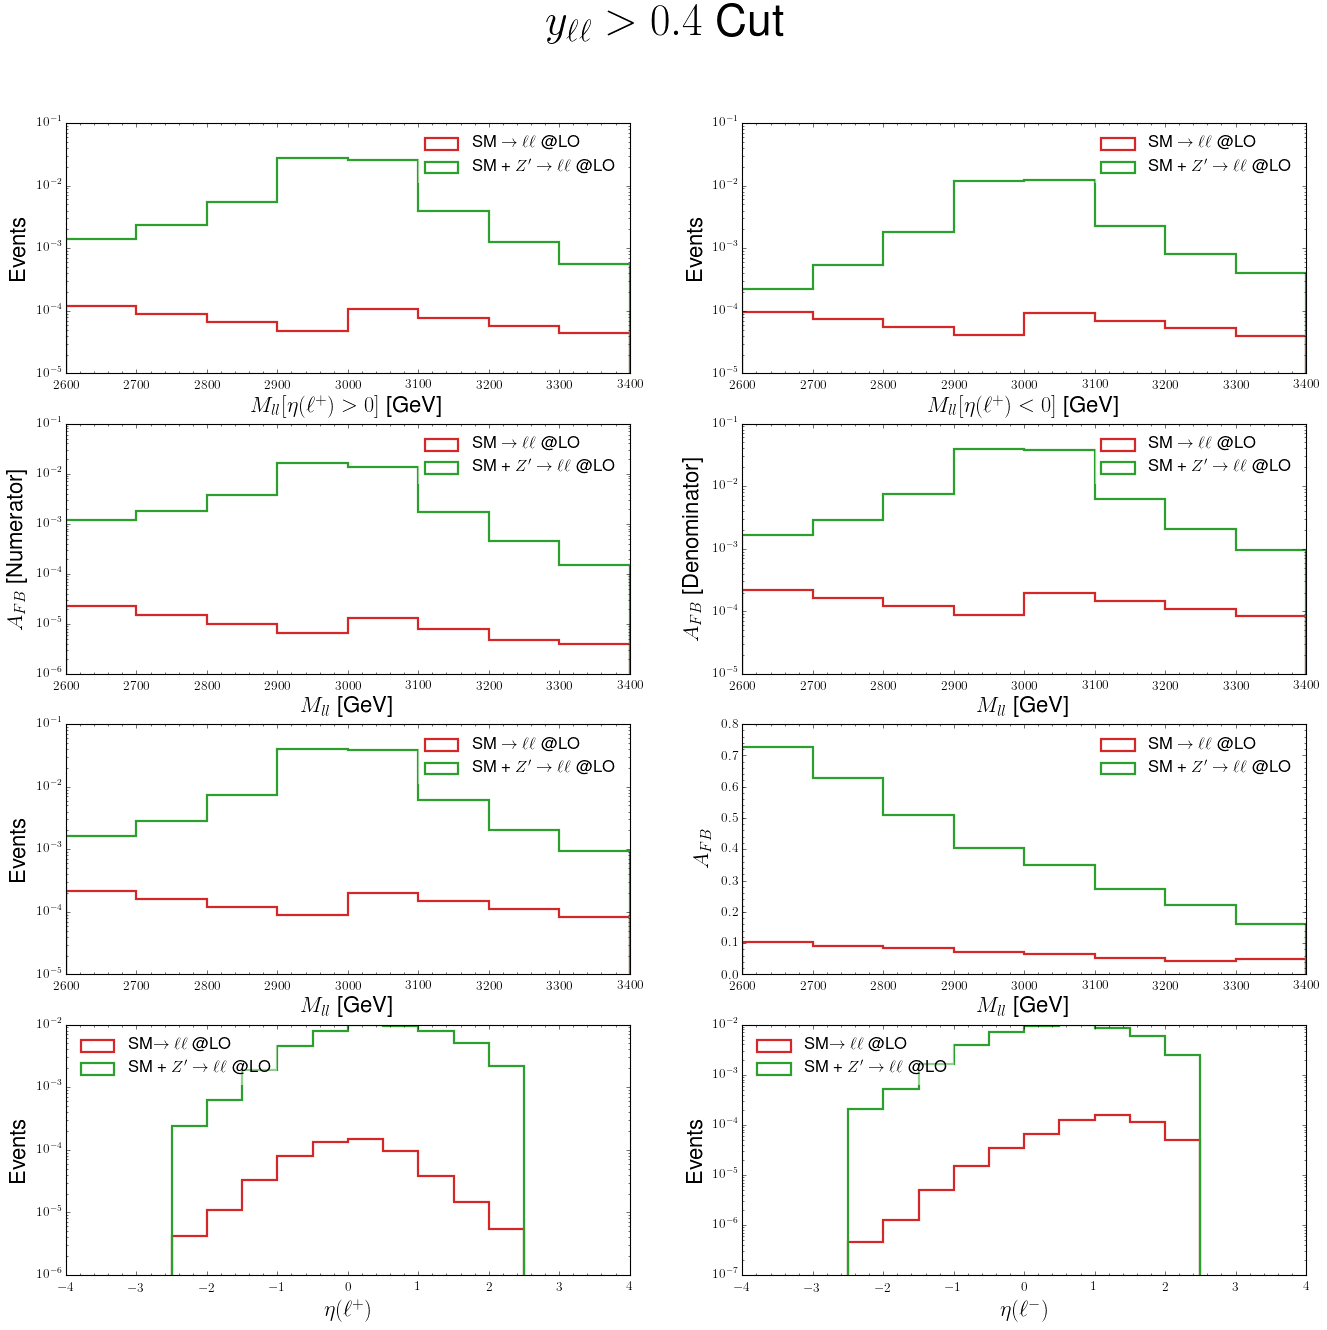

In [335]:
fig = plt.figure(1, figsize=(20, 18), facecolor='w', edgecolor='k')
fig.suptitle(r'$ y_{\ell \ell} > 0.4 $ Cut', fontsize=40)

bins = np.array(sm1_histos[sm1_histos.name=='AFB_pos_Rap_04'].binMin).tolist()+[max(sm1_histos[sm1_histos.name=='AFB_neg_Rap_04'].binMax)]
Etabins = np.array(sm1_histos[sm1_histos.name=='Eta_lp_Rap_04'].binMin).tolist()+[max(sm1_histos[sm1_histos.name=='Eta_lp_Rap_04'].binMax)]


lp_pos = plt.hist(sm1_histos[sm1_histos.name=='AFB_pos_Rap_04'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(sm1_histos[sm1_histos.name=='AFB_pos_Rap_04'].value,dtype=float)*sm1.xsec/sm1_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

lp_neg = plt.hist(sm2_histos[sm2_histos.name=='AFB_neg_Rap_04'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(sm2_histos[sm2_histos.name=='AFB_neg_Rap_04'].value,dtype=float)*sm2.xsec/sm2_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical") 

lp_pos_NLO = plt.hist(sm1NLO_histos[sm1NLO_histos.name=='AFB_pos_Rap_04'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(sm1NLO_histos[sm1NLO_histos.name=='AFB_pos_Rap_04'].value,dtype=float)*sm1NLO.xsec/sm1NLO_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

lp_neg_NLO = plt.hist(sm2NLO_histos[sm2NLO_histos.name=='AFB_neg_Rap_04'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(sm2NLO_histos[sm2NLO_histos.name=='AFB_neg_Rap_04'].value,dtype=float)*sm2NLO.xsec/sm2NLO_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical") 

AFBm = lp_pos[0] - lp_neg[0]
AFBp = lp_pos[0] + lp_neg[0]

AFBm_NLO = lp_pos_NLO[0] - lp_neg_NLO[0]
AFBp_NLO = lp_pos_NLO[0] + lp_neg_NLO[0]

lpEta_1 = plt.hist(sm1_histos[sm1_histos.name=='Eta_lp_Rap_04'].binlabel,bins=Etabins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(sm1_histos[sm1_histos.name=='Eta_lp_Rap_04'].value,dtype=float)*sm1.xsec/sm1_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
                  
lpEta_2 = plt.hist(sm2_histos[sm2_histos.name=='Eta_lp_Rap_04'].binlabel,bins=Etabins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(sm2_histos[sm2_histos.name=='Eta_lp_Rap_04'].value,dtype=float)*sm2.xsec/sm2_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")    

lmEta_1 = plt.hist(sm1_histos[sm1_histos.name=='Eta_lm_Rap_04'].binlabel,bins=Etabins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(sm1_histos[sm1_histos.name=='Eta_lm_Rap_04'].value,dtype=float)*sm1.xsec/sm1_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
                  
lmEta_2 = plt.hist(sm2_histos[sm2_histos.name=='Eta_lm_Rap_04'].binlabel,bins=Etabins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(sm2_histos[sm2_histos.name=='Eta_lm_Rap_04'].value,dtype=float)*sm2.xsec/sm2_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")


lpEta_1_NLO = plt.hist(sm1NLO_histos[sm1NLO_histos.name=='Eta_lp_Rap_04'].binlabel,bins=Etabins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(sm1NLO_histos[sm1NLO_histos.name=='Eta_lp_Rap_04'].value,dtype=float)*sm1NLO.xsec/sm1NLO_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
                  
lpEta_2_NLO = plt.hist(sm2NLO_histos[sm2NLO_histos.name=='Eta_lp_Rap_04'].binlabel,bins=Etabins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(sm2NLO_histos[sm2NLO_histos.name=='Eta_lp_Rap_04'].value,dtype=float)*sm2NLO.xsec/sm2NLO_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")    

lmEta_1_NLO = plt.hist(sm1NLO_histos[sm1NLO_histos.name=='Eta_lm_Rap_04'].binlabel,bins=Etabins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(sm1NLO_histos[sm1NLO_histos.name=='Eta_lm_Rap_04'].value,dtype=float)*sm1NLO.xsec/sm1NLO_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
                  
lmEta_2_NLO = plt.hist(sm2NLO_histos[sm2NLO_histos.name=='Eta_lm_Rap_04'].binlabel,bins=Etabins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(sm2NLO_histos[sm2NLO_histos.name=='Eta_lm_Rap_04'].value,dtype=float)*sm2NLO.xsec/sm2NLO_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")


ax1 = plt.subplot(4, 2, 1)
plt.hist(sm1_histos[sm1_histos.name=='AFB_pos_Rap_04'].binlabel,bins=bins,
             label=r'SM $ \to \ell \ell$ @LO', histtype="step", rwidth=1.0,
             weights=lp_pos[0],
             color=None, edgecolor='tab:red', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(sm1NLO_histos[sm1NLO_histos.name=='AFB_pos_Rap_04'].binlabel,bins=bins,
             label=r'SM + $Z^\prime \to \ell \ell$ @LO', histtype="step", rwidth=1.0,
             weights=lp_pos_NLO[0],
             color=None, edgecolor='tab:green', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.xlabel('$M_{ll} [\eta(\ell^+)>0] $ [GeV]' , fontsize=20)
plt.ylabel('Events' , fontsize=20)
plt.yscale('log')

ax2 = plt.subplot(4, 2, 2)
plt.hist(sm2_histos[sm2_histos.name=='AFB_neg_Rap_04'].binlabel,bins=bins,
             label=r'SM $ \to \ell \ell$ @LO', histtype="step", rwidth=1.0,
             weights=lp_neg[0],
             color=None, edgecolor='tab:red', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(sm2NLO_histos[sm2NLO_histos.name=='AFB_neg_Rap_04'].binlabel,bins=bins,
             label=r'SM + $Z^\prime \to \ell \ell$ @LO', histtype="step", rwidth=1.0,
             weights=lp_neg_NLO[0],
             color=None, edgecolor='tab:green', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.xlabel('$M_{ll} [\eta(\ell^+)<0] $ [GeV]' , fontsize=20)
plt.ylabel('Events' , fontsize=20)
plt.yscale('log')

ax3 = plt.subplot(4, 2, 3)
plt.hist(sm1_histos[sm1_histos.name=='AFB_neg_Rap_04'].binlabel,bins=bins,
             label=r'SM $ \to \ell \ell$ @LO', histtype="step", rwidth=1.0,
             weights=abs(AFBm),
             color=None, edgecolor='tab:red', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(sm1NLO_histos[sm1NLO_histos.name=='AFB_neg_Rap_04'].binlabel,bins=bins,
             label=r'SM + $Z^\prime \to \ell \ell$ @LO', histtype="step", rwidth=1.0,
             weights=abs(AFBm_NLO),
             color=None, edgecolor='tab:green', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.yscale('log')
plt.xlabel('$M_{ll}$ [GeV]' , fontsize=20)
plt.ylabel('$A_{FB}$ [Numerator]' , fontsize=20)

ax4 = plt.subplot(4, 2, 4)
plt.hist(sm1_histos[sm1_histos.name=='AFB_pos_Rap_04'].binlabel,bins=bins,
             label=r'SM $ \to \ell \ell$ @LO', histtype="step", rwidth=1.0,
             weights=AFBp,
             color=None, edgecolor='tab:red', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(sm1NLO_histos[sm1NLO_histos.name=='AFB_pos_Rap_04'].binlabel,bins=bins,
             label=r'SM + $Z^\prime \to \ell \ell$ @LO', histtype="step", rwidth=1.0,
             weights=AFBp_NLO,
             color=None, edgecolor='tab:green', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.yscale('log')
plt.xlabel('$M_{ll}$ [GeV]' , fontsize=20)
plt.ylabel('$A_{FB}$ [Denominator]' , fontsize=20)

ax5 = plt.subplot(4, 2, 5)
plt.hist(sm1_histos[sm1_histos.name=='AFB_pos_Rap_04'].binlabel,bins=bins,
             label=r'SM $ \to \ell \ell$ @LO', histtype="step", rwidth=1.0,
             weights=abs(AFBp),
             color=None, edgecolor='tab:red', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(sm1NLO_histos[sm1NLO_histos.name=='AFB_pos_Rap_04'].binlabel,bins=bins,
             label=r'SM + $Z^\prime \to \ell \ell$ @LO', histtype="step", rwidth=1.0,
             weights=abs(AFBp_NLO),
             color=None, edgecolor='tab:green', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.yscale('log')
plt.xlabel('$M_{ll}$ [GeV]' , fontsize=20)
plt.ylabel('Events' , fontsize=20)

ax6 = plt.subplot(4, 2, 6)
plt.hist(sm1_histos[sm1_histos.name=='AFB_neg_Rap_04'].binlabel,bins=bins,
             label=r'SM $ \to \ell \ell$ @LO', histtype="step", rwidth=1.0,
             weights=AFBm/np.where(AFBp==0,1e-10,AFBp), 
             color=None, edgecolor='tab:red', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(sm1NLO_histos[sm1NLO_histos.name=='AFB_neg_Rap_04'].binlabel,bins=bins,
             label=r'SM + $Z^\prime \to \ell \ell$ @LO', histtype="step", rwidth=1.0,
             weights=AFBm_NLO/np.where(AFBp_NLO==0,1e-10,AFBp_NLO), 
             color=None, edgecolor='tab:green', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.xlabel('$M_{ll}$ [GeV]' , fontsize=20)
plt.ylabel('$A_{FB}$' , fontsize=20)

ax7 = plt.subplot(4, 2, 7)
plt.hist(sm1_histos[sm1_histos.name=='Eta_lp_Rap_04'].binlabel,bins=Etabins,
             label=r'SM$ \to \ell \ell$ @LO', histtype="step", rwidth=1.0,
             weights=lpEta_1[0]+lpEta_2[0],
             color=None, edgecolor='tab:red', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(sm1NLO_histos[sm1NLO_histos.name=='Eta_lp_Rap_04'].binlabel,bins=Etabins,
             label=r'SM + $Z^\prime \to \ell \ell$ @LO', histtype="step", rwidth=1.0,
             weights=lpEta_1_NLO[0]+lpEta_2_NLO[0],
             color=None, edgecolor='tab:green', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.yscale('log')
plt.xlabel('$\eta(\ell^+)$' , fontsize=20)
plt.ylabel('Events' , fontsize=20)

ax8 = plt.subplot(4, 2, 8)
plt.hist(sm1_histos[sm2_histos.name=='Eta_lm_Rap_04'].binlabel,bins=Etabins,
             label=r'SM$ \to \ell \ell$ @LO', histtype="step", rwidth=1.0,
             weights=lmEta_1[0]+lmEta_2[0],
             color=None, edgecolor='tab:red', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(sm1NLO_histos[sm2NLO_histos.name=='Eta_lm_Rap_04'].binlabel,bins=Etabins,
             label=r'SM + $Z^\prime \to \ell \ell$ @LO', histtype="step", rwidth=1.0,
             weights=lmEta_1_NLO[0]+lmEta_2_NLO[0],
             color=None, edgecolor='tab:green', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.yscale('log')
plt.xlabel('$\eta(\ell^-)$' , fontsize=20)
plt.ylabel('Events' , fontsize=20)

leg = ax1.legend(loc='upper right',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax1.set_xlim([min(bins),max(bins)])

leg = ax2.legend(loc='upper right',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax2.set_xlim([min(bins),max(bins)])

leg = ax3.legend(loc='upper right',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax3.set_xlim([min(bins),max(bins)])

leg = ax4.legend(loc='upper right',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax4.set_xlim([min(bins),max(bins)])

leg = ax5.legend(loc='upper right',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax5.set_xlim([min(bins),max(bins)])

leg = ax6.legend(loc='upper right',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax6.set_xlim([min(bins),max(bins)])

leg = ax7.legend(loc='upper left',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax7.set_xlim([min(Etabins),max(Etabins)])


leg = ax8.legend(loc='upper left',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax8.set_xlim([min(Etabins),max(Etabins)])

plt.show()

# Absolute rapidity |y| > 0.8

In [323]:
ma5 = '/home/phylab/hepwork/madanalysis5'

"""
sm1  = Collection(collection_path= ma5+'/SSM_Zptoll/Output/SAF/SMtoll_Mll0and200_poseta/MadAnalysis5job_3/Cutflows',
                    saf_file       = ma5+"/SSM_Zptoll/Output/SAF/SMtoll_Mll0and200_poseta/SMtoll_Mll0and200_poseta.saf",
                    lumi           = 100.)
sm1_sumw   = (sm1['Rap_08'][0].sumw)
#sm1_sumw   = (0.91091+1.47887)/2
sm1_histos = df(ma5+'/SSM_Zptoll/Output/SAF/SMtoll_Mll0and200_poseta/MadAnalysis5job_3/Histograms/histos.saf')

sm2  = Collection(collection_path= ma5+'/SSM_Zptoll/Output/SAF/SMtoll_Mll0and200_negeta/MadAnalysis5job_3/Cutflows',
                    saf_file       = ma5+"/SSM_Zptoll/Output/SAF/SMtoll_Mll0and200_negeta/SMtoll_Mll0and200_negeta.saf",
                    lumi           = 100.)
sm2_sumw   = (sm2['Rap_08'][0].sumw)
#sm2_sumw   = (0.91091+1.47887)/2
sm2_histos = df(ma5+'/SSM_Zptoll/Output/SAF/SMtoll_Mll0and200_negeta/MadAnalysis5job_3/Histograms/histos.saf')
"""

sm1  = Collection(collection_path= ma5+'/SSM_Zptoll/Output/SAF/SMtoll_poseta/MadAnalysis5job_0/Cutflows',
                    saf_file       = ma5+"/SSM_Zptoll/Output/SAF/SMtoll_poseta/SMtoll_poseta.saf",
                    lumi           = 100.)
sm1_sumw   = (sm1['Rap_08'][0].sumw)
sm1_histos = df(ma5+'/SSM_Zptoll/Output/SAF/SMtoll_poseta/MadAnalysis5job_0/Histograms/histos.saf')

sm2  = Collection(collection_path= ma5+'/SSM_Zptoll/Output/SAF/SMtoll_negeta/MadAnalysis5job_0/Cutflows',
                    saf_file       = ma5+"/SSM_Zptoll/Output/SAF/SMtoll_negeta/SMtoll_negeta.saf",
                    lumi           = 100.)
sm2_sumw   = (sm2['Rap_08'][0].sumw)
sm2_histos = df(ma5+'/SSM_Zptoll/Output/SAF/SMtoll_negeta/MadAnalysis5job_0/Histograms/histos.saf')


sm1NLO  = Collection(collection_path= ma5+'/SSM_Zptoll/Output/SAF/BSMtoll_poseta/MadAnalysis5job_0/Cutflows',
                    saf_file       = ma5+"/SSM_Zptoll/Output/SAF/BSMtoll_poseta/BSMtoll_poseta.saf")
sm1NLO_sumw   = (sm1NLO['Rap_08'][0].sumw)
sm1NLO_histos = df(ma5+'/SSM_Zptoll/Output/SAF/BSMtoll_poseta/MadAnalysis5job_0/Histograms/histos.saf')

sm2NLO  = Collection(collection_path= ma5+'/SSM_Zptoll/Output/SAF/BSMtoll_negeta/MadAnalysis5job_1/Cutflows',
                    saf_file       = ma5+"/SSM_Zptoll/Output/SAF/BSMtoll_negeta/BSMtoll_negeta.saf")
sm2NLO_sumw   = (sm2NLO['Rap_08'][0].sumw)
sm2NLO_histos = df(ma5+'/SSM_Zptoll/Output/SAF/BSMtoll_negeta/MadAnalysis5job_1/Histograms/histos.saf')

In [ ]:
#from CutFlowTable import CutFlowTable
#out=open('comparison_y08.tex','w')
#CutFlowTable(sm,StockSM, sample_names=['SM @LO','Stock SM @LO']).write_comparison_table(out, mcunc=False)
#!make > mk.log && rm Makefile

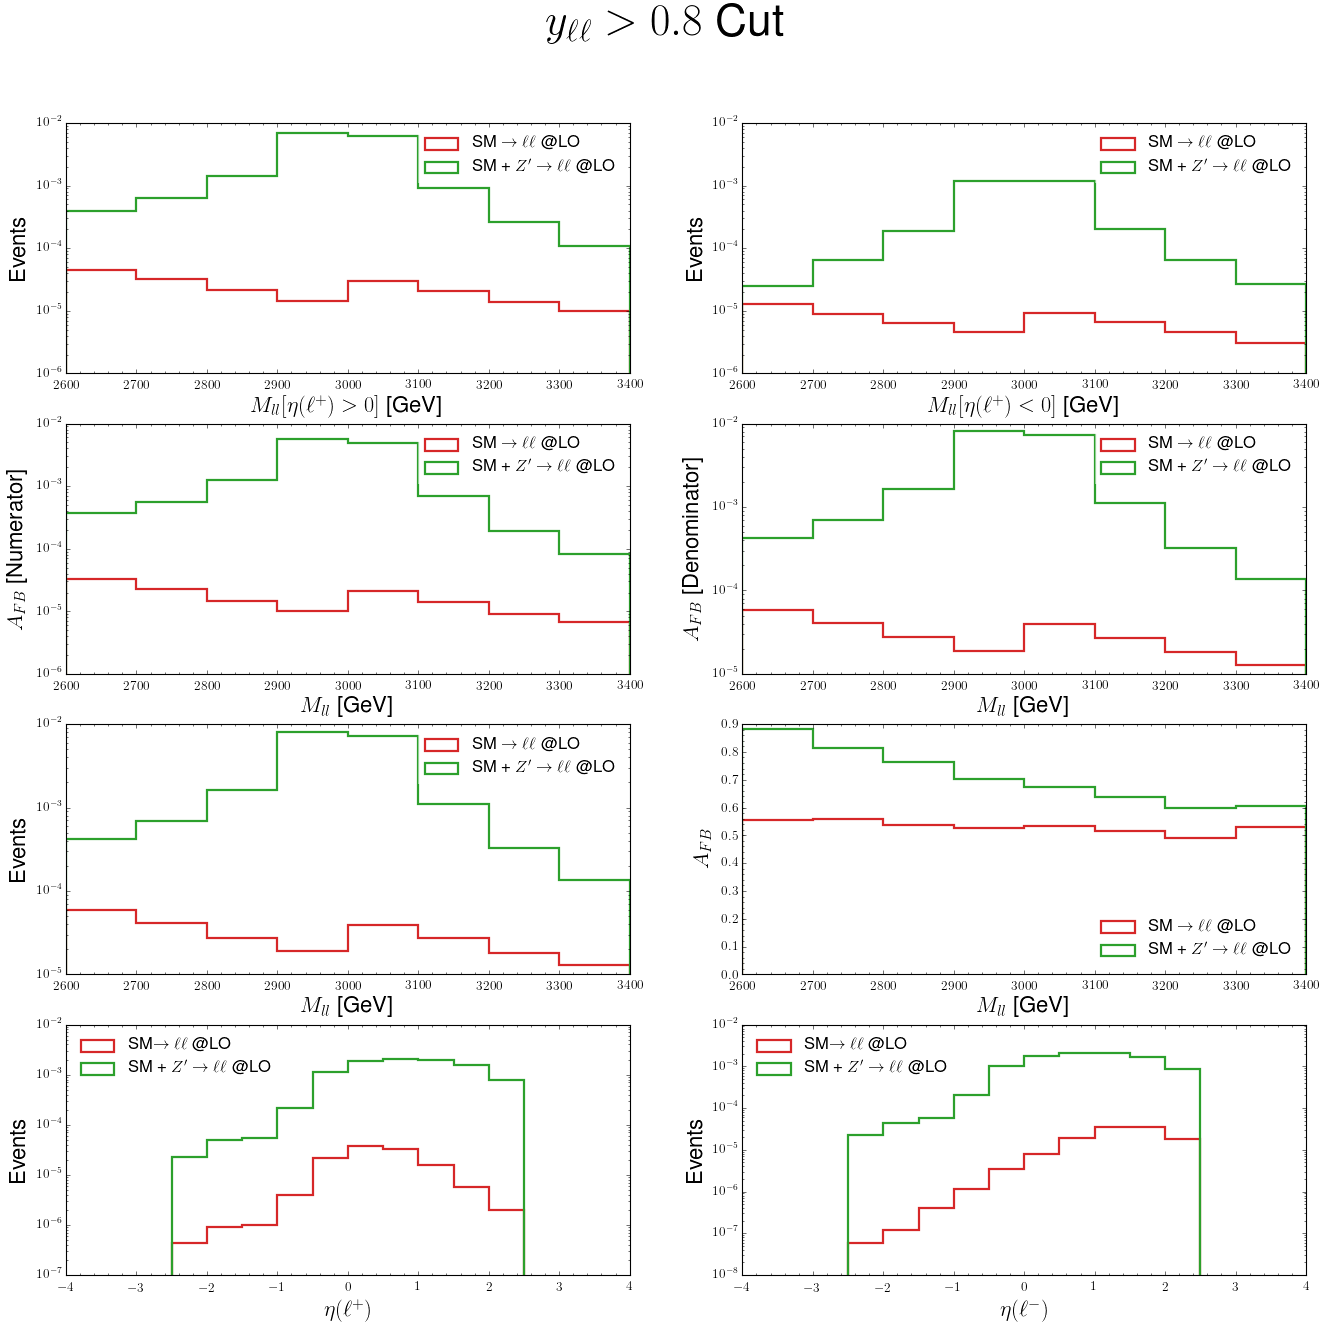

In [328]:
fig = plt.figure(1, figsize=(20, 18), facecolor='w', edgecolor='k')
fig.suptitle(r'$ y_{\ell \ell} > 0.8 $ Cut', fontsize=40)

bins = np.array(sm1_histos[sm1_histos.name=='AFB_pos_Rap_08'].binMin).tolist()+[max(sm1_histos[sm1_histos.name=='AFB_neg_Rap_08'].binMax)]
Etabins = np.array(sm1_histos[sm1_histos.name=='Eta_lp_Rap_08'].binMin).tolist()+[max(sm1_histos[sm1_histos.name=='Eta_lp_Rap_08'].binMax)]


lp_pos = plt.hist(sm1_histos[sm1_histos.name=='AFB_pos_Rap_08'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(sm1_histos[sm1_histos.name=='AFB_pos_Rap_08'].value,dtype=float)*sm1.xsec/sm1_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

lp_neg = plt.hist(sm2_histos[sm2_histos.name=='AFB_neg_Rap_08'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(sm2_histos[sm2_histos.name=='AFB_neg_Rap_08'].value,dtype=float)*sm2.xsec/sm2_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical") 

lp_pos_NLO = plt.hist(sm1NLO_histos[sm1NLO_histos.name=='AFB_pos_Rap_08'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(sm1NLO_histos[sm1NLO_histos.name=='AFB_pos_Rap_08'].value,dtype=float)*sm1NLO.xsec/sm1NLO_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

lp_neg_NLO = plt.hist(sm2NLO_histos[sm2NLO_histos.name=='AFB_neg_Rap_08'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(sm2NLO_histos[sm2NLO_histos.name=='AFB_neg_Rap_08'].value,dtype=float)*sm2NLO.xsec/sm2NLO_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical") 

AFBm = lp_pos[0] - lp_neg[0]
AFBp = lp_pos[0] + lp_neg[0]

AFBm_NLO = lp_pos_NLO[0] - lp_neg_NLO[0]
AFBp_NLO = lp_pos_NLO[0] + lp_neg_NLO[0]

lpEta_1 = plt.hist(sm1_histos[sm1_histos.name=='Eta_lp_Rap_08'].binlabel,bins=Etabins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(sm1_histos[sm1_histos.name=='Eta_lp_Rap_08'].value,dtype=float)*sm1.xsec/sm1_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
                  
lpEta_2 = plt.hist(sm2_histos[sm2_histos.name=='Eta_lp_Rap_08'].binlabel,bins=Etabins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(sm2_histos[sm2_histos.name=='Eta_lp_Rap_08'].value,dtype=float)*sm2.xsec/sm2_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")    

lmEta_1 = plt.hist(sm1_histos[sm1_histos.name=='Eta_lm_Rap_08'].binlabel,bins=Etabins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(sm1_histos[sm1_histos.name=='Eta_lm_Rap_08'].value,dtype=float)*sm1.xsec/sm1_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
                  
lmEta_2 = plt.hist(sm2_histos[sm2_histos.name=='Eta_lm_Rap_08'].binlabel,bins=Etabins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(sm2_histos[sm2_histos.name=='Eta_lm_Rap_08'].value,dtype=float)*sm2.xsec/sm2_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")





lpEta_1_NLO = plt.hist(sm1NLO_histos[sm1NLO_histos.name=='Eta_lp_Rap_08'].binlabel,bins=Etabins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(sm1NLO_histos[sm1NLO_histos.name=='Eta_lp_Rap_08'].value,dtype=float)*sm1NLO.xsec/sm1NLO_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
                  
lpEta_2_NLO = plt.hist(sm2NLO_histos[sm2NLO_histos.name=='Eta_lp_Rap_08'].binlabel,bins=Etabins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(sm2NLO_histos[sm2NLO_histos.name=='Eta_lp_Rap_08'].value,dtype=float)*sm2NLO.xsec/sm2NLO_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")    

lmEta_1_NLO = plt.hist(sm1NLO_histos[sm1NLO_histos.name=='Eta_lm_Rap_08'].binlabel,bins=Etabins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(sm1NLO_histos[sm1NLO_histos.name=='Eta_lm_Rap_08'].value,dtype=float)*sm1NLO.xsec/sm1NLO_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
                  
lmEta_2_NLO = plt.hist(sm2NLO_histos[sm2NLO_histos.name=='Eta_lm_Rap_08'].binlabel,bins=Etabins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(sm2NLO_histos[sm2NLO_histos.name=='Eta_lm_Rap_08'].value,dtype=float)*sm2NLO.xsec/sm2NLO_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")


ax1 = plt.subplot(4, 2, 1)
plt.hist(sm1_histos[sm1_histos.name=='AFB_pos_Rap_08'].binlabel,bins=bins,
             label=r'SM $ \to \ell \ell$ @LO', histtype="step", rwidth=1.0,
             weights=lp_pos[0],
             color=None, edgecolor='tab:red', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(sm1NLO_histos[sm1NLO_histos.name=='AFB_pos_Rap_08'].binlabel,bins=bins,
             label=r'SM + $Z^\prime \to \ell \ell$ @LO', histtype="step", rwidth=1.0,
             weights=lp_pos_NLO[0],
             color=None, edgecolor='tab:green', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.xlabel('$M_{ll} [\eta(\ell^+)>0] $ [GeV]' , fontsize=20)
plt.ylabel('Events' , fontsize=20)
plt.yscale('log')

ax2 = plt.subplot(4, 2, 2)
plt.hist(sm2_histos[sm2_histos.name=='AFB_neg_Rap_08'].binlabel,bins=bins,
             label=r'SM $ \to \ell \ell$ @LO', histtype="step", rwidth=1.0,
             weights=lp_neg[0],
             color=None, edgecolor='tab:red', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(sm2NLO_histos[sm2NLO_histos.name=='AFB_neg_Rap_08'].binlabel,bins=bins,
             label=r'SM + $Z^\prime \to \ell \ell$ @LO', histtype="step", rwidth=1.0,
             weights=lp_neg_NLO[0],
             color=None, edgecolor='tab:green', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.xlabel('$M_{ll} [\eta(\ell^+)<0] $ [GeV]' , fontsize=20)
plt.ylabel('Events' , fontsize=20)
plt.yscale('log')

ax3 = plt.subplot(4, 2, 3)
plt.hist(sm1_histos[sm1_histos.name=='AFB_neg_Rap_08'].binlabel,bins=bins,
             label=r'SM $ \to \ell \ell$ @LO', histtype="step", rwidth=1.0,
             weights=abs(AFBm),
             color=None, edgecolor='tab:red', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(sm1NLO_histos[sm1NLO_histos.name=='AFB_neg_Rap_08'].binlabel,bins=bins,
             label=r'SM + $Z^\prime \to \ell \ell$ @LO', histtype="step", rwidth=1.0,
             weights=abs(AFBm_NLO),
             color=None, edgecolor='tab:green', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.yscale('log')
plt.xlabel('$M_{ll}$ [GeV]' , fontsize=20)
plt.ylabel('$A_{FB}$ [Numerator]' , fontsize=20)

ax4 = plt.subplot(4, 2, 4)
plt.hist(sm1_histos[sm1_histos.name=='AFB_pos_Rap_08'].binlabel,bins=bins,
             label=r'SM $ \to \ell \ell$ @LO', histtype="step", rwidth=1.0,
             weights=AFBp,
             color=None, edgecolor='tab:red', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(sm1NLO_histos[sm1NLO_histos.name=='AFB_pos_Rap_08'].binlabel,bins=bins,
             label=r'SM + $Z^\prime \to \ell \ell$ @LO', histtype="step", rwidth=1.0,
             weights=AFBp_NLO,
             color=None, edgecolor='tab:green', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.yscale('log')
plt.xlabel('$M_{ll}$ [GeV]' , fontsize=20)
plt.ylabel('$A_{FB}$ [Denominator]' , fontsize=20)

ax5 = plt.subplot(4, 2, 5)
plt.hist(sm1_histos[sm1_histos.name=='AFB_pos_Rap_08'].binlabel,bins=bins,
             label=r'SM $ \to \ell \ell$ @LO', histtype="step", rwidth=1.0,
             weights=abs(AFBp),
             color=None, edgecolor='tab:red', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(sm1NLO_histos[sm1NLO_histos.name=='AFB_pos_Rap_08'].binlabel,bins=bins,
             label=r'SM + $Z^\prime \to \ell \ell$ @LO', histtype="step", rwidth=1.0,
             weights=abs(AFBp_NLO),
             color=None, edgecolor='tab:green', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.yscale('log')
plt.xlabel('$M_{ll}$ [GeV]' , fontsize=20)
plt.ylabel('Events' , fontsize=20)

ax6 = plt.subplot(4, 2, 6)
plt.hist(sm1_histos[sm1_histos.name=='AFB_neg_Rap_08'].binlabel,bins=bins,
             label=r'SM $ \to \ell \ell$ @LO', histtype="step", rwidth=1.0,
             weights=AFBm/np.where(AFBp==0,1e-10,AFBp), 
             color=None, edgecolor='tab:red', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(sm1NLO_histos[sm1NLO_histos.name=='AFB_neg_Rap_08'].binlabel,bins=bins,
             label=r'SM + $Z^\prime \to \ell \ell$ @LO', histtype="step", rwidth=1.0,
             weights=AFBm_NLO/np.where(AFBp_NLO==0,1e-10,AFBp_NLO), 
             color=None, edgecolor='tab:green', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.xlabel('$M_{ll}$ [GeV]' , fontsize=20)
plt.ylabel('$A_{FB}$' , fontsize=20)

ax7 = plt.subplot(4, 2, 7)
plt.hist(sm1_histos[sm1_histos.name=='Eta_lp_Rap_08'].binlabel,bins=Etabins,
             label=r'SM$ \to \ell \ell$ @LO', histtype="step", rwidth=1.0,
             weights=lpEta_1[0]+lpEta_2[0],
             color=None, edgecolor='tab:red', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(sm1NLO_histos[sm1NLO_histos.name=='Eta_lp_Rap_08'].binlabel,bins=Etabins,
             label=r'SM + $Z^\prime \to \ell \ell$ @LO', histtype="step", rwidth=1.0,
             weights=lpEta_1_NLO[0]+lpEta_2_NLO[0],
             color=None, edgecolor='tab:green', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.yscale('log')
plt.xlabel('$\eta(\ell^+)$' , fontsize=20)
plt.ylabel('Events' , fontsize=20)

ax8 = plt.subplot(4, 2, 8)
plt.hist(sm1_histos[sm2_histos.name=='Eta_lm_Rap_08'].binlabel,bins=Etabins,
             label=r'SM$ \to \ell \ell$ @LO', histtype="step", rwidth=1.0,
             weights=lmEta_1[0]+lmEta_2[0],
             color=None, edgecolor='tab:red', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(sm1NLO_histos[sm2NLO_histos.name=='Eta_lm_Rap_08'].binlabel,bins=Etabins,
             label=r'SM + $Z^\prime \to \ell \ell$ @LO', histtype="step", rwidth=1.0,
             weights=lmEta_1_NLO[0]+lmEta_2_NLO[0],
             color=None, edgecolor='tab:green', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.yscale('log')
plt.xlabel('$\eta(\ell^-)$' , fontsize=20)
plt.ylabel('Events' , fontsize=20)

leg = ax1.legend(loc='upper right',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax1.set_xlim([min(bins),max(bins)])

leg = ax2.legend(loc='upper right',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax2.set_xlim([min(bins),max(bins)])

leg = ax3.legend(loc='upper right',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax3.set_xlim([min(bins),max(bins)])

leg = ax4.legend(loc='upper right',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax4.set_xlim([min(bins),max(bins)])

leg = ax5.legend(loc='upper right',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax5.set_xlim([min(bins),max(bins)])

leg = ax6.legend(loc='lower right',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax6.set_xlim([min(bins),max(bins)])

leg = ax7.legend(loc='upper left',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax7.set_xlim([min(Etabins),max(Etabins)])


leg = ax8.legend(loc='upper left',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax8.set_xlim([min(Etabins),max(Etabins)])

plt.show()

In [131]:
StockSM.xsec

663.6815

In [132]:
sm.xsec

663.43

In [133]:
StockSM_sumw

1041.86

In [134]:
sm_sumw

1041.565

In [96]:
StockSM_NLO_Mll 

(array([1.24389512e+02, 5.58195901e+02, 2.39454933e+03, 5.58071687e+03,
        5.84714688e+04, 1.87600264e+03, 3.85692840e+02, 1.65853915e+02,
        9.32997581e+01, 4.87404524e+01]),
 array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.]),
 <a list of 10 Patch objects>)

In [111]:
bins = np.array(StockSM_NLO_histos[StockSM_NLO_histos.name=='Eta_lp_Rap_0'].binMin).tolist()+[max(StockSM_NLO_histos[StockSM_NLO_histos.name=='Eta_lp_Rap_0'].binMax)]

In [112]:
bins

[-4.0, -3.2, -2.4, -1.6, -0.8, 0.0, 0.8, 1.6, 2.4, 3.2, 4.0]

In [117]:
StockSM_NLO_Eta[0]

array([17355.78204205,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ])